## Grid Search CV

In [1]:
import wget
URL = "http://ovne.org/download/Customer-Churn-Records.csv"
response = wget.download(URL, "Customer-Churn-Records.csv")

In [3]:
import pandas as pd
df = pd.read_csv("Customer-Churn-Records.csv", header = 0, na_values = "NA", comment = '\t', sep=',', skipinitialspace=True)
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname', 'Complain', 'Satisfaction Score', 'Card Type', 'Point Earned'], inplace = True)
X = df.drop(['Exited'], axis = 1)
y = df.Exited
dict = {'France' : 0, 'Germany': 1, 'Spain': 2, 'Female': 0, 'Male': 1}
X.replace(dict, inplace = True)

/var/folders/bj/4zbr51sj4fsbvtllcchl3wzc0000gn/T/ipykernel_1025/13531775.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.replace(dict, inplace = True)


In [4]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [6]:
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()

In [7]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

decision_tree_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [8]:
knn = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, scoring='accuracy', cv=5)
dt = GridSearchCV(estimator=decision_tree_model, param_grid=decision_tree_param_grid, scoring='accuracy', cv = 5)

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [12]:
print("Best hyperparameters for KNN: ", knn.best_params_)
print("Best accuracy for KNN: ", knn.best_score_)

Best hyperparameters for KNN:  {'n_neighbors': 7, 'weights': 'uniform'}
Best accuracy for KNN:  0.7733749999999999


In [13]:
print('Best hyperparameters for Decision Tree: ', dt.best_params_)
print('Best accuracy for Decision Tree: ', dt.best_score_)

Best hyperparameters for Decision Tree:  {'max_depth': 10, 'min_samples_split': 10}
Best accuracy for Decision Tree:  0.8380000000000001


In [14]:
knn_best_model = knn.best_estimator_
dt_best_model = dt.best_estimator_

knn_test_accuracy = knn_best_model.score(X_test, y_test)
decision_tree_test_accuracy = dt_best_model.score(X_test, y_test)

print("Test accuracy for best KNN model: ", knn_test_accuracy)
print("Test accuracy for best Decision Tree model: ", decision_tree_test_accuracy)

Test accuracy for best KNN model:  0.777
Test accuracy for best Decision Tree model:  0.851


## Randomize Search CV

In [15]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [17]:
knn_model = KNeighborsClassifier()
decision_tree_model = DecisionTreeClassifier()

In [18]:
import numpy as np

In [20]:
knn_param_dist = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance']
}

decision_tree_param_dist = {
    'max_depth': [None] + list(np.arange(1, 31)),
    'min_samples_split': np.arange(2,11)
}

In [21]:
knn = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_param_dist, n_iter=10, scoring='accuracy', cv = 5)
dt = RandomizedSearchCV(estimator=decision_tree_model, param_distributions=decision_tree_param_dist, n_iter=10, scoring='accuracy', cv=5)

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)

/Users/mac/myenv/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [None, np.int64(1),
                                                      np.int64(2), np.int64(3),
                                                      np.int64(4), np.int64(5),
                                                      np.int64(6), np.int64(7),
                                                      np.int64(8), np.int64(9),
                                                      np.int64(10),
                                                      np.int64(11),
                                                      np.int64(12),
                                                      np.int64(13),
                                                      np.int64(14),
                                                      np.int64(15),
                                                      np.int64(16),
                                                      np.int64(17),
                                                      np.int64(18),
                                                      np.int64(19),
                                                      np.int64(20),
                                                      np.int64(21),
                                                      np.int64(22),
                                                      np.int64(23),
                                                      np.int64(24),
                                                      np.int64(25),
                                                      np.int64(26),
                                                      np.int64(27),
                                                      np.int64(28),
                                                      np.int64(29), ...],
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                   scoring='accuracy')

In [24]:
print("Best hyperparameters for KNN:", knn.best_params_)
print("Best accuracy for KNN:", knn.best_score_)

Best hyperparameters for KNN: {'weights': 'uniform', 'n_neighbors': np.int64(16)}
Best accuracy for KNN: 0.796625


In [25]:
print("Best hyperparameters for Decision Tree:", dt.best_params_)
print("Best accuracy for Decision Tree:", dt.best_score_)

Best hyperparameters for Decision Tree: {'min_samples_split': np.int64(4), 'max_depth': np.int64(6)}
Best accuracy for Decision Tree: 0.85175


In [26]:
knn_best_model = knn.best_estimator_
dt_best_model = dt.best_estimator_

knn_test_accuracy = knn_best_model.score(X_test, y_test)
decision_tree_test_accuracy = dt_best_model.score(X_test, y_test)

print("Test accuracy for best KNN model:", knn_test_accuracy)
print("Test accuracy for best Decision Tree model:", decision_tree_test_accuracy)

Test accuracy for best KNN model: 0.791
Test accuracy for best Decision Tree model: 0.8525


## Sử dụng mô hình trong hồi quy

In [27]:
import wget
URL = "http://ovne.org/download/housing_price.csv"
response = wget.download(URL, "housing_price.csv")

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
df = pd.read_csv("housing_price.csv", header = 0, na_values="NA", comment="\t", sep=',', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageArea    1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  MSSubClass    1460 non-null   int64
 11  OverallCond   1460 non-null   int64
 12  SalePrice     1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


In [30]:
df.head()

,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,GrLivArea,MSSubClass,OverallCond,SalePrice
0,8450,2003,856,856,854,2,3,8,548,1710,60,5,208500
1,9600,1976,1262,1262,0,2,3,6,460,1262,20,8,181500
2,11250,2001,920,920,866,2,3,6,608,1786,60,5,223500
3,9550,1915,756,961,756,1,3,7,642,1717,70,5,140000
4,14260,2000,1145,1145,1053,2,4,9,836,2198,60,5,250000


In [31]:
X = df.iloc[:, :12]
Y = df.iloc[:, 12]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

knn_model = KNeighborsRegressor()
decision_tree_model = DecisionTreeRegressor()

knn_param_dist = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance']
}

decision_tree_param_dist = {
    'max_depth': [None] + list(np.arange(1, 41)),
    'min_samples_split': np.arange(2, 11)
}

knn_random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_param_dist, n_iter=20, scoring='neg_mean_absolute_error', cv = 5)
decision_tree_random_search = RandomizedSearchCV(estimator=decision_tree_model, param_distributions=decision_tree_param_dist, n_iter = 20, scoring='neg_mean_absolute_error', cv=5)

knn_random_search.fit(X_train, y_train)
decision_tree_random_search.fit(X_train, y_train)

print("Best hyperparameters for KNN:", knn_random_search.best_params_)
print("Best negative mean absolute error for KNN:", knn_random_search.best_score_)

print("Best hyperparmeters for Decision Tree:", decision_tree_random_search.best_params_)
print("Best negative mean absolute error for Decision Tree:", decision_tree_random_search.best_score_)

Best hyperparameters for KNN: {'weights': 'distance', 'n_neighbors': np.int64(12)}
Best negative mean absolute error for KNN: -29017.157676615745
Best hyperparmeters for Decision Tree: {'min_samples_split': np.int64(9), 'max_depth': np.int64(24)}
Best negative mean absolute error for Decision Tree: -27105.951552103914


In [37]:
knn_best_model = knn_random_search.best_estimator_
decision_tree_best_model = decision_tree_random_search.best_estimator_

knn_test_mae = knn_best_model.score(X_test, y_test)
decision_tree_test_mae = decision_tree_best_model.score(X_test, y_test)
print("Test score for best KNN model:", knn_test_mae)
print("Test score for best Decision Tree model:", decision_tree_test_mae)

Test score for best KNN model: 0.6636346263514873
Test score for best Decision Tree model: 0.8233626686681418


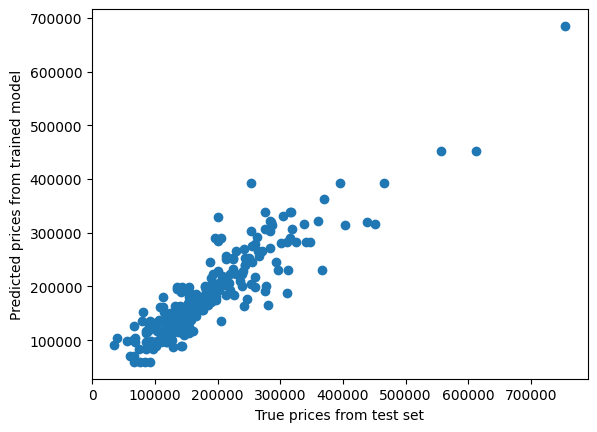

In [38]:
y_pred_dt = decision_tree_best_model.predict(X_test)
plt.scatter(y_test, y_pred_dt)
plt.xlabel("True prices from test set")
plt.ylabel("Predicted prices from trained model")
plt.show()

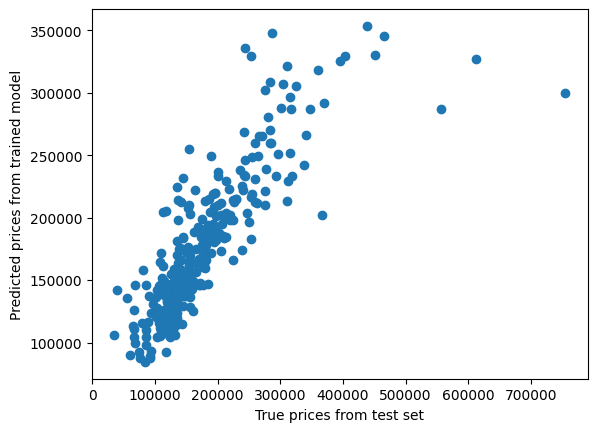

In [39]:
y_pred_knn = knn_best_model.predict(X_test)
plt.scatter(y_test, y_pred_knn)
plt.xlabel("True prices from test set")
plt.ylabel("Predicted prices from trained model")
plt.show()